<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/sanghunoh/reports/%EA%B3%BC%EC%A0%9C_5_1_3_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(3) (20점) 주어진 데이터는 크게 2개의 군집으로 구성되어 있습니다. 이를 K-means 군집화를 이용하여 K가 2인 경우에 대해 군집화를 수행하고 최종 단계 군집화 결과를 대표벡터와 함께 표시하시오.

# K-menas 알고리즘
데이터 $ x_j(j=1,..., N) $
1. 초기화 : 각 cluster 당 임의로 대표벡터 부여 $ m_k $
2. 데이터 그룹핑 : 대표 벡터들과 거리 측정해 라벨링
$ C_k=\{x_j | d(x_j, m_k) <= d(x_j, m_i), i=1,..., K\} $
3. 대표벡터 수정 : 
$ 
\begin{align}
  m_k^{new} &= \frac{1}{|C_k|} \sum_{x_j ∈ C_k} x_j
\end{align}
$
4. 반복 여부 결정 : 2~3을 반복 여부, $ m_k와 m_k^{new} $ 차이로 판단

### 데이터 생성

## 목적 함수
$
\begin{align} 
  J &= \sum_{n=1}^N \sum_{i=1}^N r_{ni} ||x_n - m_i||^2 \\
  r_{ni} &= \{ \begin{array}{c1}   
              1 & if & i=argmin_j || x_n - m_j ||^2 \\
              0 & otherwise
            \end{array}
\end{align}
$

In [1]:
!pip install mat73

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import mat73
mat_contents = mat73.loadmat('./HW5Data_1.mat')
type(mat_contents), mat_contents.keys(),

(dict, dict_keys(['data']))

In [3]:
cluster_all = mat_contents['data']
cluster_all.shape

(800, 2)

###대표 백터 생성

In [4]:
import numpy as np

kernel = 2
indices = np.random.randint(cluster_all.shape[0], size=kernel)
print(indices)
means = cluster_all[indices, :]
means

[717  32]


array([[11.82137569,  0.94400677],
       [ 0.91363763,  2.50136481]])

###그룹핑과 대표벡터 계산

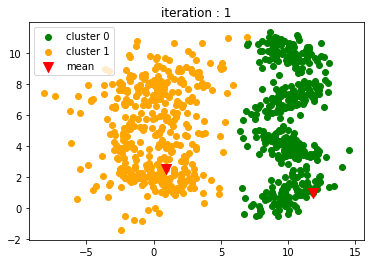

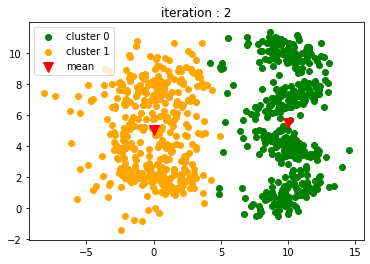

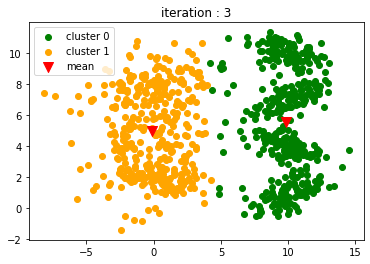

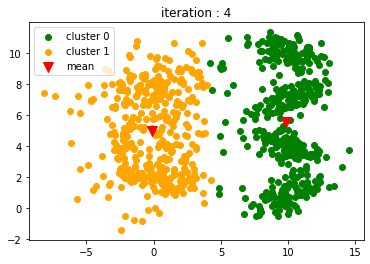

In [5]:
row_all_count = cluster_all.shape[0]
cmode = ["green", "orange"]
from scipy.spatial import distance as dstn
import matplotlib.pyplot as plt

# 군집화 위해 반복 수행
for iteration in range(10):
    plt.figure(iteration+1)
    cluster_label = np.zeros((row_all_count))

    # 모든 데이터와 각 cluster 대표 벡터와 비교
    for i in range(row_all_count):
        distance_measure = np.full((kernel), fill_value=0)
        for j in range(kernel):
            distance = dstn.euclidean(cluster_all[i, :], means[j, :])
            distance_measure[j] = distance
        # 거리가 가장 가까운 데이터 확인
        cluster_label[i] = np.argmin(distance_measure)
    # 대표 벡터 재 계산 위해 복사
    past_means = means.copy()
    # 계산 전 대표 벡터들 그래프 표시
    for j in range(kernel):
        cluster_label_mask = (cluster_label == j)
        cluster_label_cnt = cluster_all[cluster_label_mask].shape[0]
        plt.scatter(cluster_all[cluster_label_mask, 0],
                    cluster_all[cluster_label_mask, 1], label=f'cluster {j}', color=cmode[j])
        means[j,:] = np.mean(cluster_all[cluster_label_mask, :], axis=0)    # 새로운 벡터 계산
    # 계산 전 대표 벡터들 그래프 표시
    plt.scatter(past_means[:, 0], past_means[:, 1], marker='v', s=100, color='red', label='mean')
    pass
    plt.title(f'iteration : {iteration+1}')
    plt.legend()
    plt.show()

    # 평균 벡터 변화 없으면 정지
    if (np.array_equal(means, past_means)):
        break
